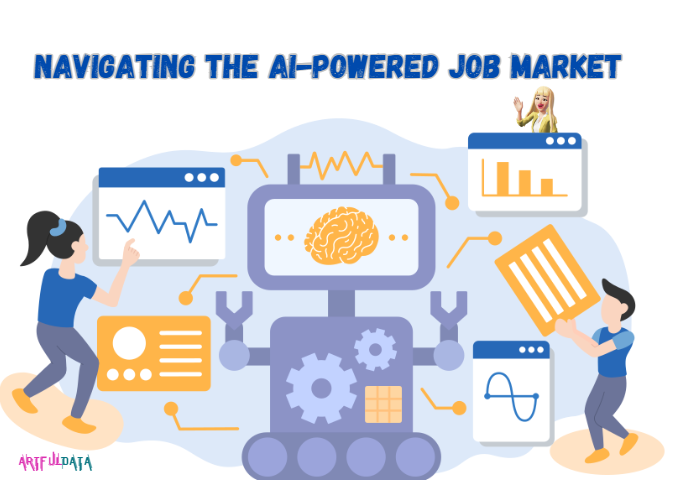

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
df= pd.read_csv("/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv")
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary_USD,500.0,91222.390974,20504.291453,31969.526346,78511.514863,91998.195286,103971.282092,155209.821614


# Data Preprocessing

In [4]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [6]:
df.shape

(500, 10)

In [7]:
# Check Missing 

df.isnull().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Salary_USD',
       'Remote_Friendly', 'Job_Growth_Projection'],
      dtype='object')

In [10]:
print(df.dtypes)

Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object


# Exploratory Data Analysis (EDA)

In [11]:
#frequency count 
print(df['Job_Title'].value_counts())

Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: Job_Title, dtype: int64


## Categorical features in plot

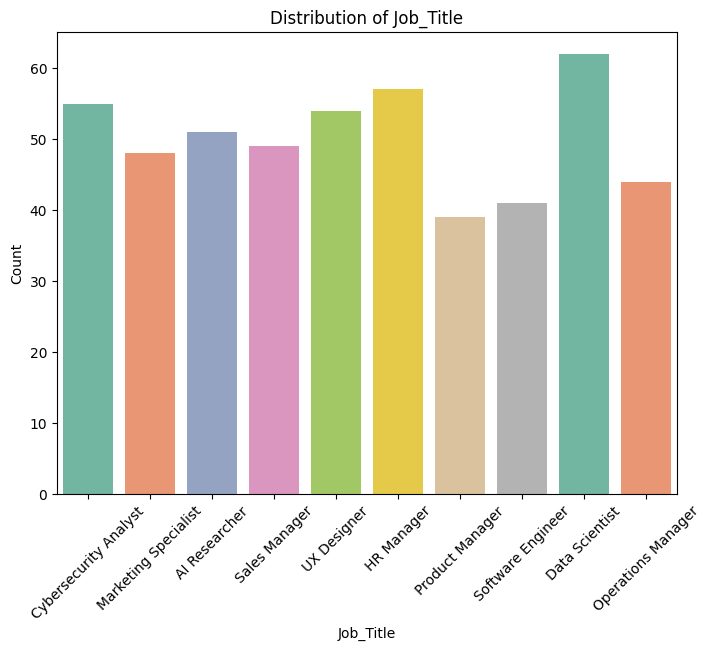

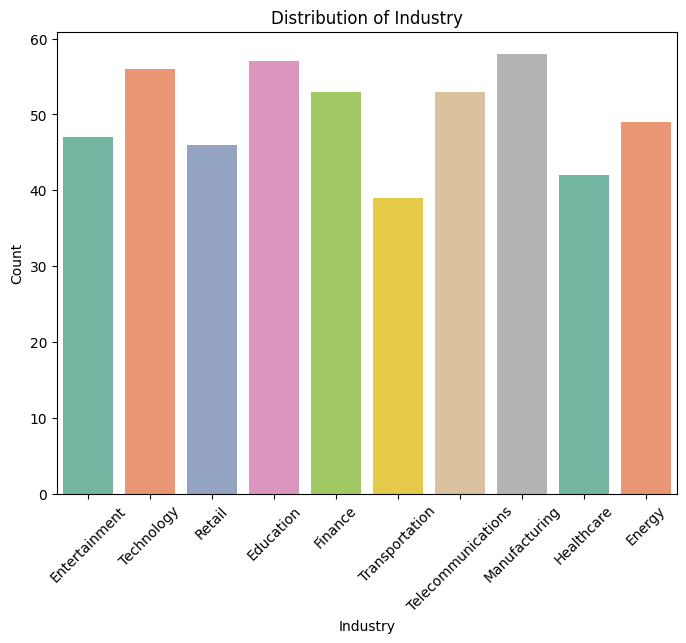

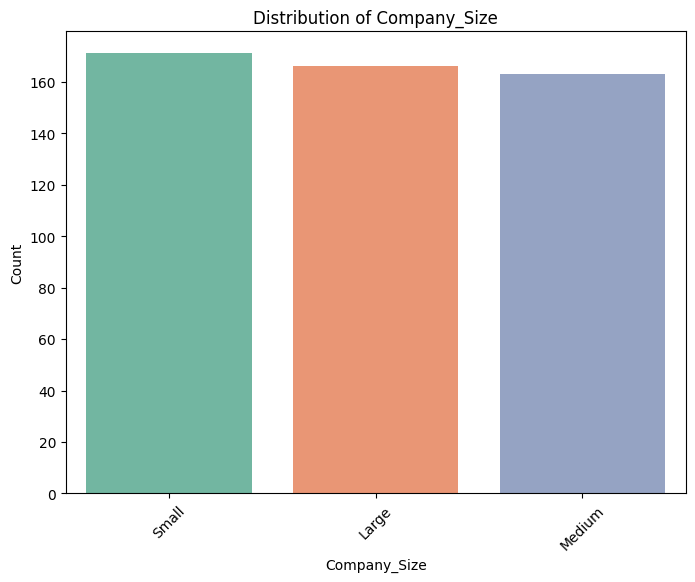

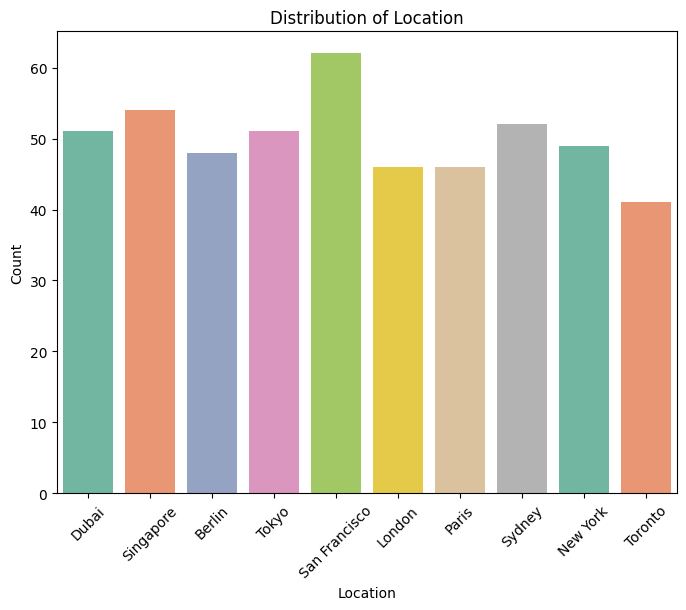

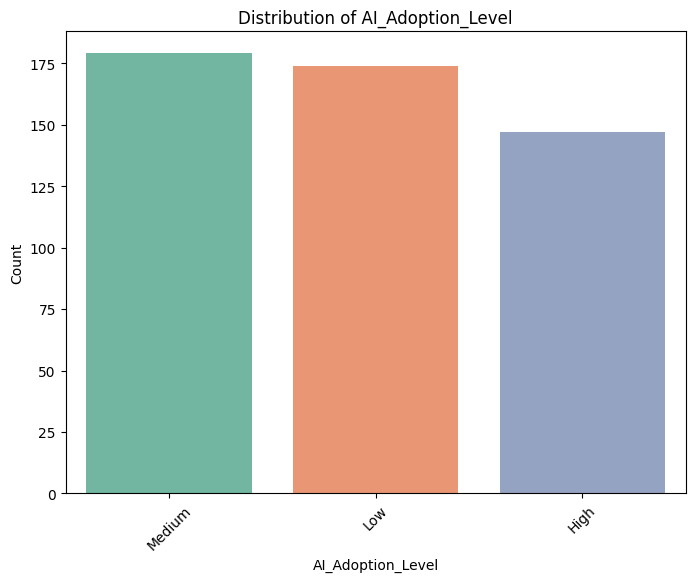

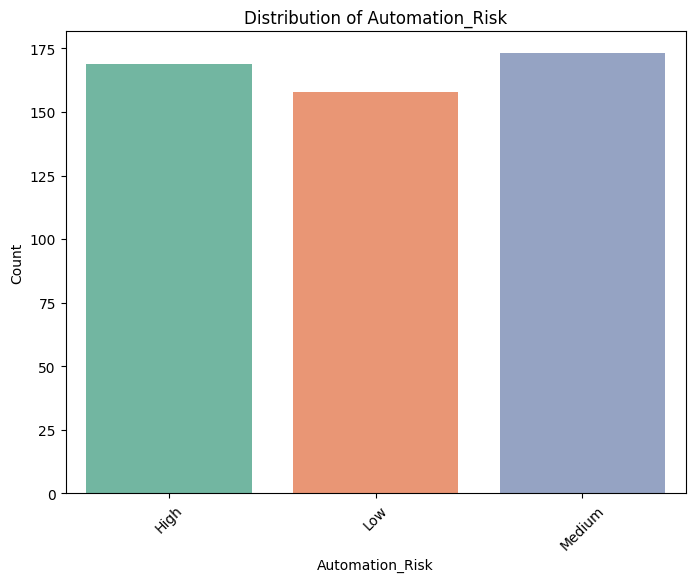

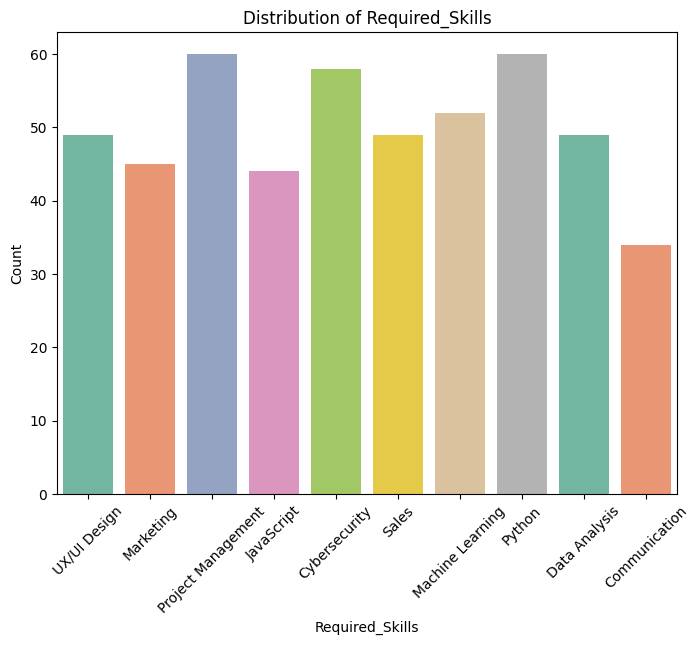

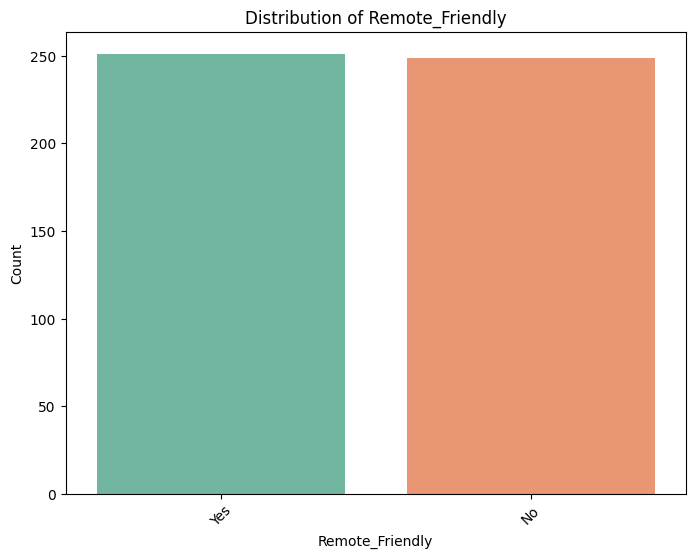

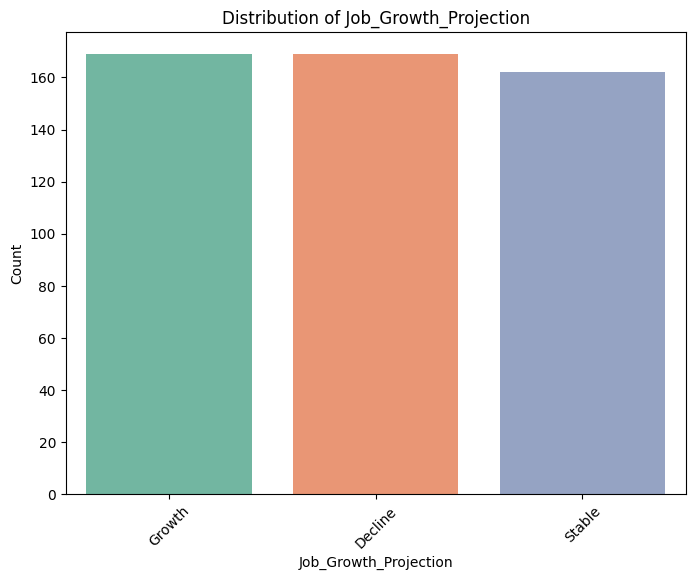

In [12]:
categorical_features = ['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 
       'Remote_Friendly', 'Job_Growth_Projection']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Histogram Sallary

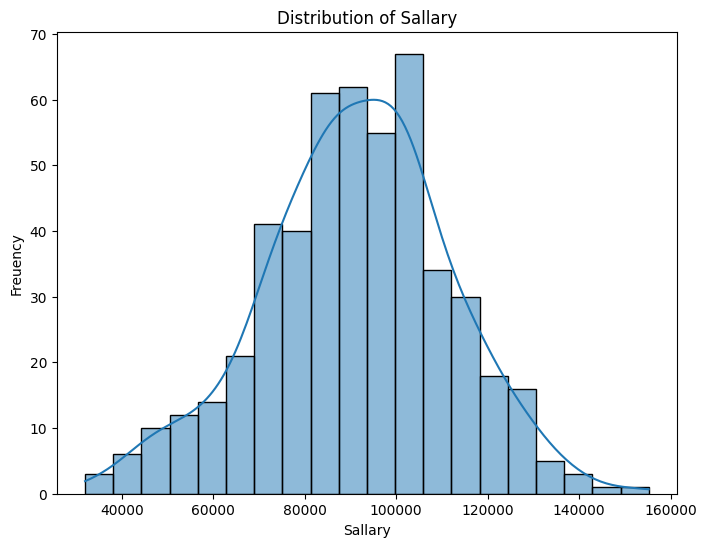

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x= 'Salary_USD' , kde= True)
plt.title(f'Distribution of Sallary')
plt.xlabel("Sallary")
plt.ylabel('Freuency')
plt.show()

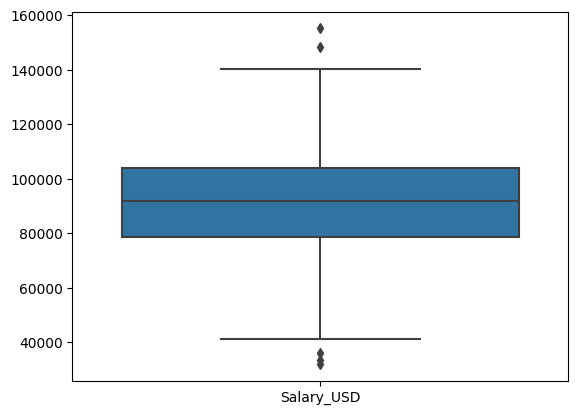

In [14]:
sns.boxplot(data=df[['Salary_USD']])
plt.show()

## Class Imbalance in Categorical Columns

In [15]:
# Value counts for categorical columns
for col in ['Job_Title', 'Industry', 'Company_Size', 'Location',
       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 
       'Remote_Friendly', 'Job_Growth_Projection']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for Job_Title:
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: Job_Title, dtype: int64

Value counts for Industry:
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: Industry, dtype: int64

Value counts for Company_Size:
Small     171
Large     166
Medium    163
Name: Company_Size, dtype: int64

Value counts for Location:
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: Location, dtyp

# Use Cases:

## Industry-wise AI Adoption:
Analyze how many industries have adopted AI at various levels (e.g., High, Medium, Low). 

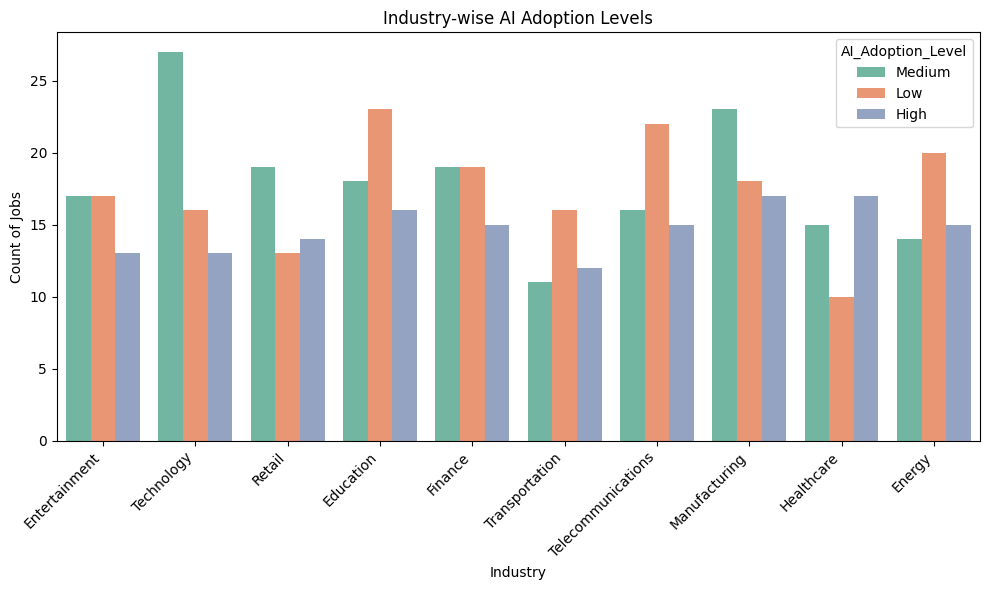

In [16]:
# Set plot size
plt.figure(figsize=(10,6))

# Create a countplot
sns.countplot(data=df, x='Industry', hue='AI_Adoption_Level', palette='Set2')
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Industry-wise AI Adoption Levels')
plt.xlabel('Industry')
plt.ylabel('Count of Jobs')

plt.tight_layout()
plt.show()


## Salary Analysis:
Compare salaries between industries with high AI adoption and those with low AI adoption to see if AI leads to higher salaries.

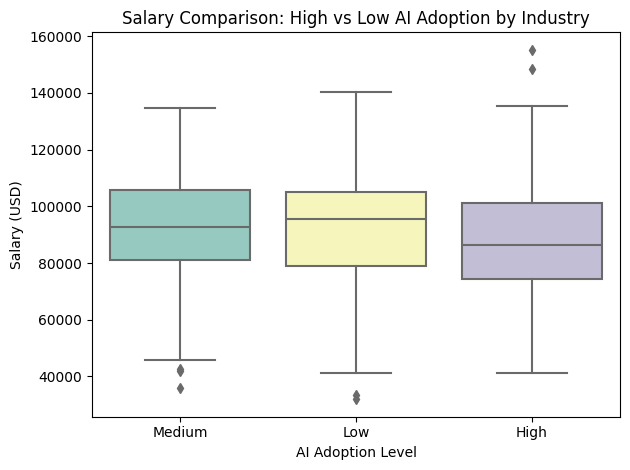

In [17]:
# Create boxplot
sns.boxplot(x='AI_Adoption_Level', y='Salary_USD', data=df, palette='Set3')

# Add title and labels
plt.title('Salary Comparison: High vs Low AI Adoption by Industry')
plt.xlabel('AI Adoption Level')
plt.ylabel('Salary (USD)')

plt.tight_layout()
plt.show()


## Automation Risk:
Relationship between AI Adoption and Automation Risk

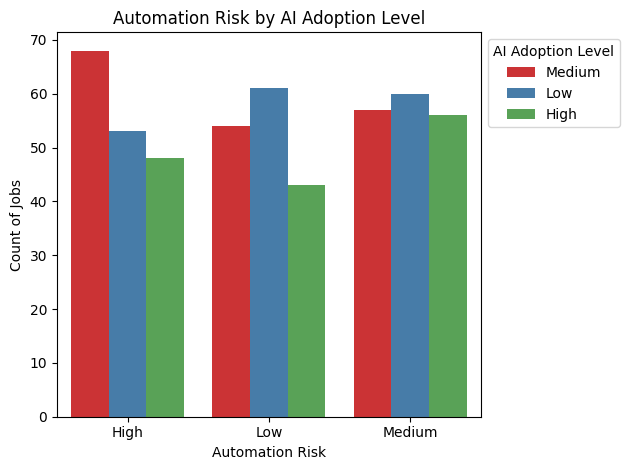

In [18]:
# Create countplot
sns.countplot(data=df, x='Automation_Risk', hue='AI_Adoption_Level', palette='Set1')

# Add title and labels
plt.title('Automation Risk by AI Adoption Level')
plt.xlabel('Automation Risk')
plt.ylabel('Count of Jobs')
plt.legend(title='AI Adoption Level', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()


## Job Growth Projection:
Industry-wise Analysis of Job Growth Influenced by AI

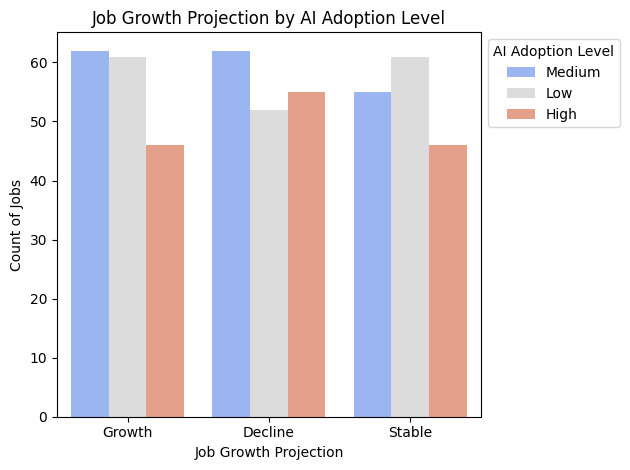

In [19]:
# Create countplot
sns.countplot(data=df, x='Job_Growth_Projection', hue='AI_Adoption_Level', palette='coolwarm')

# Add title and labels
plt.title('Job Growth Projection by AI Adoption Level')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count of Jobs')
plt.legend(title='AI Adoption Level', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()


## AI Adoption by Industry:

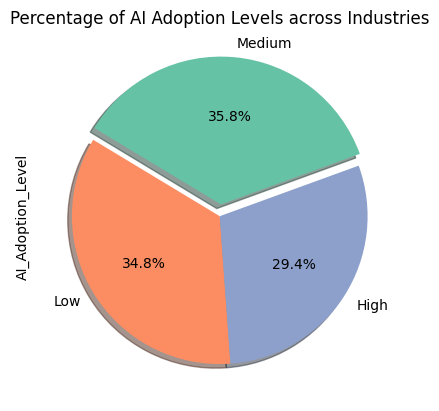

In [20]:
# Calculate percentage distribution of AI adoption levels across industries
ai_adoption_dist = df['AI_Adoption_Level'].value_counts(normalize=True) * 100

# Plot as pie chart
ai_adoption_dist.plot.pie(autopct='%1.1f%%', startangle=20, colors=sns.color_palette('Set2'), explode=(0.08,0,0 ) , shadow=True )

# Add title
plt.title('Percentage of AI Adoption Levels across Industries')

plt.show()


## Salary Distribution by AI Adoption

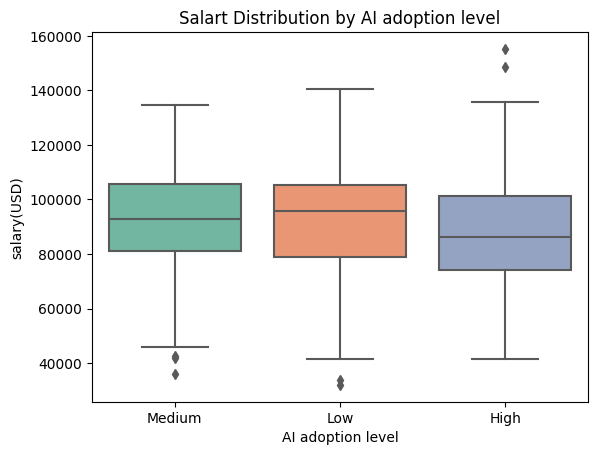

In [21]:
#create Boxplot
sns.boxplot(x='AI_Adoption_Level', y='Salary_USD',data=df, palette='Set2')
# add title and label
plt.title('Salart Distribution by AI adoption level')
plt.xlabel('AI adoption level')
plt.ylabel('salary(USD)')

plt.show()

## Job Growth Projection

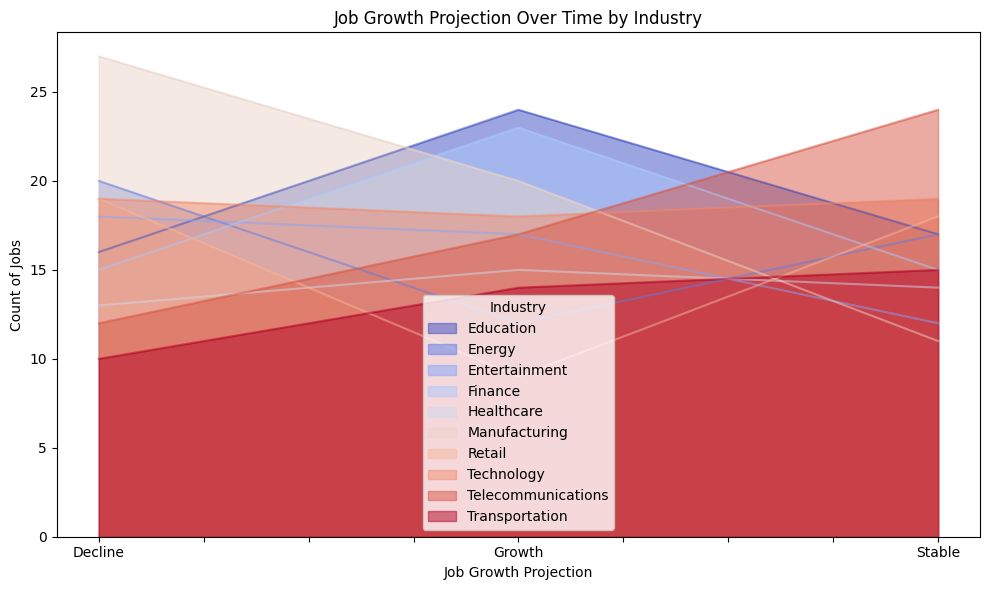

In [22]:

job_growth_over_time = df.groupby(['Job_Growth_Projection', 'Industry']).size().unstack()
# Plot as area chart
job_growth_over_time.plot(kind='area', stacked=False, figsize=(10,6), colormap='coolwarm')

# Add title and labels
plt.title('Job Growth Projection Over Time by Industry')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count of Jobs')

plt.tight_layout()
plt.show()


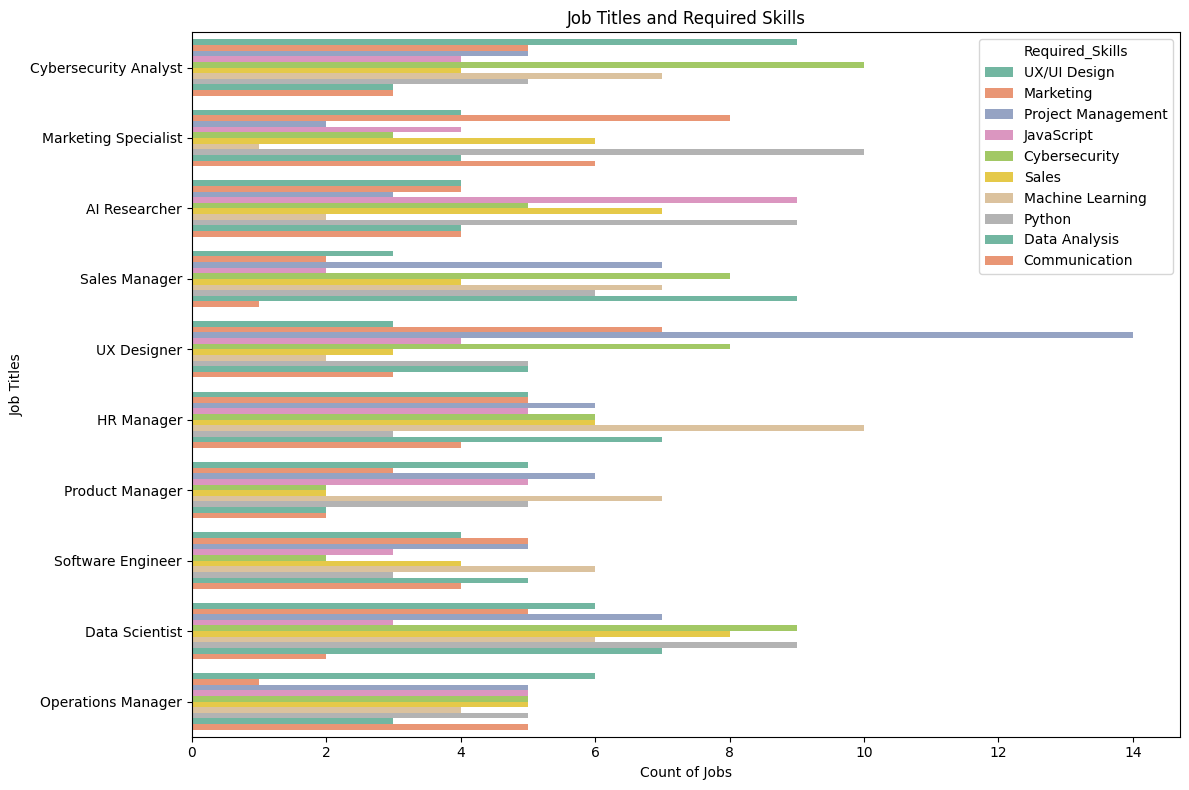

In [23]:
# Set plot size
plt.figure(figsize=(12,8))

# Create a countplot for the top skills required for each job title
sns.countplot(data=df, y='Job_Title', hue='Required_Skills', palette='Set2')

# Add title and labels
plt.title('Job Titles and Required Skills')
plt.xlabel('Count of Jobs')
plt.ylabel('Job Titles')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [24]:
df.Required_Skills.unique()




array(['UX/UI Design', 'Marketing', 'Project Management', 'JavaScript',
       'Cybersecurity', 'Sales', 'Machine Learning', 'Python',
       'Data Analysis', 'Communication'], dtype=object)

In [25]:
skill_matrix = df.groupby(['Job_Title', 'Required_Skills']).size().unstack(fill_value=0)
skill_matrix

Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Job_Title,,,,,,,,,,
AI Researcher,4,5,4,9,2,4,3,9,7,4
Cybersecurity Analyst,3,10,3,4,7,5,5,5,4,9
Data Scientist,2,9,7,3,6,5,7,9,8,6
HR Manager,4,6,7,5,10,5,6,3,6,5
Marketing Specialist,6,3,4,4,1,8,2,10,6,4
Operations Manager,5,5,3,5,4,1,5,5,5,6
Product Manager,2,2,2,5,7,3,6,5,2,5
Sales Manager,1,8,9,2,7,2,7,6,4,3
Software Engineer,4,2,5,3,6,5,5,3,4,4


<Figure size 1200x800 with 0 Axes>

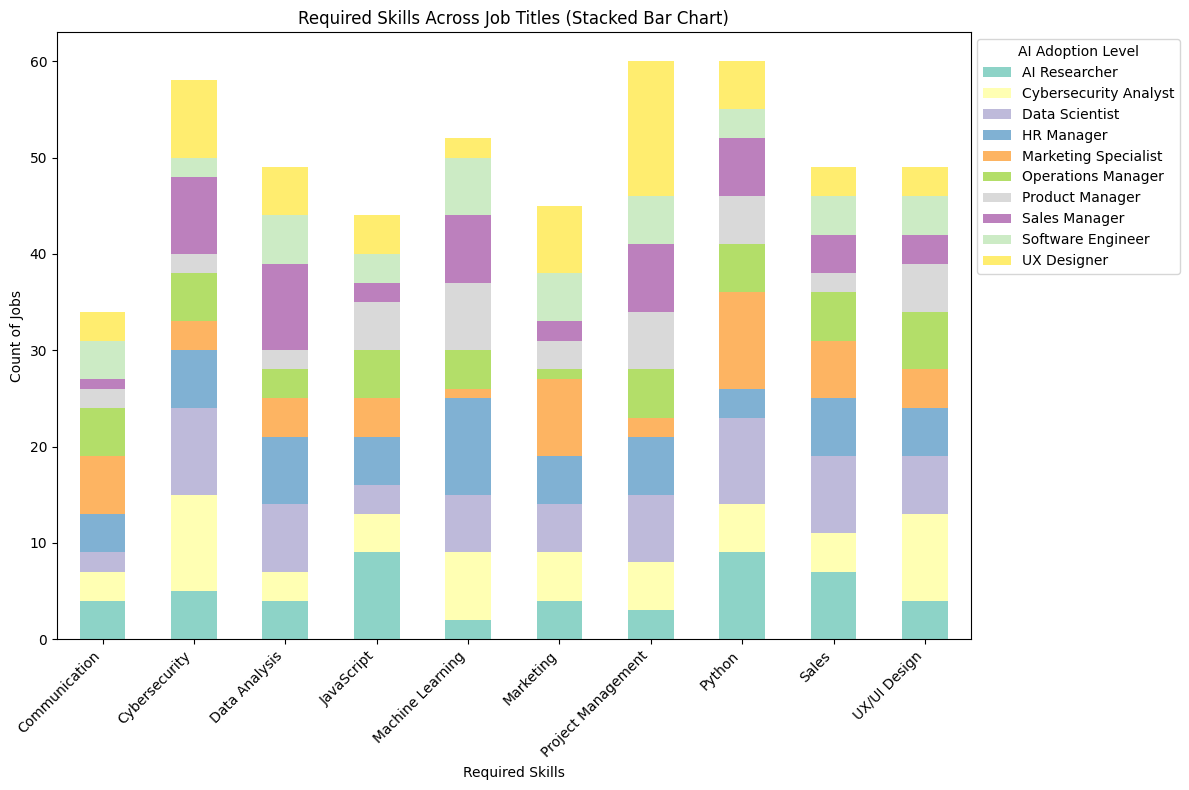

In [26]:

# Set plot size
plt.figure(figsize=(12,8))

# Create a stacked bar chart
skill_matrix.T.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12,8))

# Add title and labels
plt.title('Required Skills Across Job Titles (Stacked Bar Chart)')
plt.xlabel('Required Skills')
plt.ylabel('Count of Jobs')
plt.legend(title='AI Adoption Level', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


I like the last one! The stacked format makes it easy to spot which jobs demand a broad skill set and which ones focus on a few specialized areas, giving us a clear sense of where to focus our learning efforts depending on our career goals.

# If you enjoyed the code or found it useful, **hit that upvote button!** 🚀 It's the ultimate fuel for my coding journey (and maybe some extra coffee ☕)! Happy coding! 😄
